<a href="https://colab.research.google.com/github/zhukuixi/d2l/blob/main/OverfitUnderfit_polynomialExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/d2l-ai/d2l-zh@release  # installing d2l
!pip uninstall matplotlib
!pip install matplotlib==3.0.0
!pip install matplotlib_inline

import torch
from torch import nn
import numpy as np
from d2l import torch as d2l
from torch.utils import data


In [262]:
import math
trainSize, valiSize = 100,100
x= np.random.normal(size=(trainSize+valiSize,1))
maxPolyOrder = 20
poly_X = np.power(x,np.arange(20))
for i in range(maxPolyOrder):
    poly_X[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!

In [263]:
true_w = np.zeros(shape=(maxPolyOrder,1))
true_w[:4,0] = np.array([-1,2,-3,4])


y = poly_X@true_w
y += np.random.normal(scale=0.1,size=y.shape)

In [264]:
# NumPy ndarray转换为tensor
true_w, x, poly_X, y = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, x, poly_X, y]]   


In [265]:
def load_array(data_array,batch_size,is_train):  
  dataset = data.TensorDataset(*data_array) 
  return data.DataLoader(dataset,batch_size=batch_size,shuffle=is_train)

In [266]:
def evaluate_loss(net, data_iter, loss): 
    """评估给定数据集上模型的损失"""
    metric = d2l.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]
def train(train_X,vali_X,train_y,vali_y,num_epochs=400):
  # model
  net = nn.Sequential(nn.Linear(train_X.shape[-1], 1, bias=False))  
  # loss
  loss = nn.MSELoss(reduction="none")
  # updater
  updater = torch.optim.SGD(net.parameters(),lr=0.01)
  batch_size = min(10,train_X.shape[0])
 
  train_iter = load_array((train_X,train_y.reshape(-1,1)),batch_size,True)
  vali_iter = load_array((vali_X,vali_y.reshape(-1,1)),batch_size,False)

  animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
  
  for epoch in range(num_epochs):
    d2l.train_epoch_ch3(net, train_iter, loss, updater)  
    if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, vali_iter, loss)))
  print('weight:', net[0].weight.data.numpy())          

weight: [[-2.403314   3.3426385]]


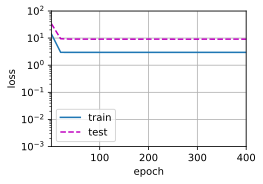

In [267]:
train(poly_X[:trainSize,:2],poly_X[trainSize:,:2],y[:trainSize,0],y[trainSize:,0])

weight: [[-1.0185982e+00  1.9824666e+00 -2.8428211e+00  3.9401193e+00
  -5.5166048e-01  5.7227874e-01 -1.8585682e-01 -1.5252315e-02
   3.9996907e-02 -6.9704667e-02  1.5650932e-01 -2.1260671e-01
   1.1641657e-01 -1.9532283e-01 -1.0981599e-01  1.1395166e-01
   2.1983203e-01  8.2785085e-02  1.2584928e-01  1.6652008e-03]]


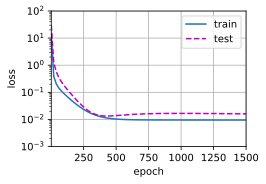

In [271]:
train(poly_X[:trainSize,:],poly_X[trainSize:,:],y[:trainSize,0],y[trainSize:,0],num_epochs=1500)

weight: [[-0.99280816  1.9741507  -2.9925268   4.0494924 ]]


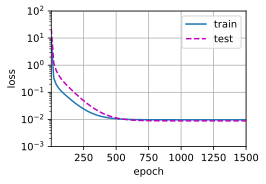

In [272]:
train(poly_X[:trainSize,:4],poly_X[trainSize:,:4],y[:trainSize,0],y[trainSize:,0],num_epochs=1500)

In [273]:
import math
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[-0.3771],
         [-1.3398]]),
 tensor([[ 1.0000e+00, -3.7713e-01,  7.1114e-02, -8.9398e-03,  8.4287e-04,
          -6.3574e-05,  3.9960e-06, -2.1529e-07,  1.0149e-08, -4.2528e-10,
           1.6039e-11, -5.4988e-13,  1.7281e-14, -5.0133e-16,  1.3505e-17,
          -3.3954e-19,  8.0032e-21, -1.7755e-22,  3.7199e-24, -7.3836e-26],
         [ 1.0000e+00, -1.3398e+00,  8.9749e-01, -4.0081e-01,  1.3425e-01,
          -3.5972e-02,  8.0324e-03, -1.5374e-03,  2.5746e-04, -3.8327e-05,
           5.1349e-06, -6.2541e-07,  6.9826e-08, -7.1962e-09,  6.8866e-10,
          -6.1509e-11,  5.1505e-12, -4.0591e-13,  3.0213e-14, -2.1304e-15]]),
 tensor([ 4.1650, -1.9710]))

In [274]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = d2l.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

weight: [[ 4.9913754  1.2122413 -3.394222   5.5484095]]


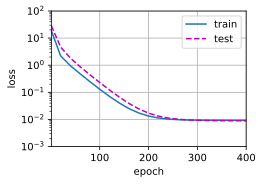

In [275]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])